# بناء نموذج تنبؤ قدرة المتدين على التسديد

In [1]:
# قراءة البيانات
# https://www.kaggle.com/ninzaami/loan-predication
import pandas as pd
data = pd.read_csv("../loan_classification.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# لنتفحص تفاصيل الأعمدة
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [3]:
# لنر الأعمدة المحتوية على قيم فارغة
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 # تجهيز و تنظيف البيانات

In [4]:
# قيمة الدين تميل لجهة اليمين، لا يفضل استخدام المتوسط أو الوسيط هنا، سنستبدلها بقيمة -١ 
data['LoanAmount'].plot.hist(bins=60)

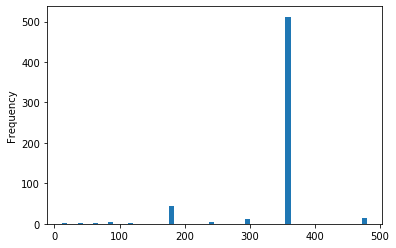

In [5]:
# هنا تدور أغلب القيم حول قيمة ٣٦٠. لذا سنستخدم قيمة -١ للتعويض أيضًا
data['Loan_Amount_Term'].plot.hist(bins=60)

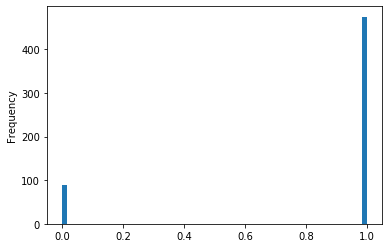

In [6]:
# نفس الحالة هنا كالعمود السابق، سنستبدلها ب-١
data['Credit_History'].plot.hist(bins=60)

In [7]:
cols_to_fill_na = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in cols_to_fill_na:
    data[col].fillna(-1, inplace=True)
data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,-1.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
# لنرَ الآن الأعمدة الفئوية
# الأغلب من الذكور، لذا سنبدل القيم الفارغة بالذكور
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
# الأغلب متزوجون، لذا سنبدل القيم الفارغة بنعم
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
# الأغلب لا يعولون لذا سنبدل القيم الفارغة بصفر
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
# الأغلب لا يعملون عملًا حرًا، لذا سنملأ القيم الفارغة بلا
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [12]:
data['Gender'].fillna('Male', inplace=True)
data['Married'].fillna('Yes', inplace=True)
data['Dependents'].fillna('0', inplace=True)
data['Self_Employed'].fillna('No', inplace=True)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,-1.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
# سنحول القيم الفئوية لأرقام (صفر و واحد)، و في حالة كانت أكثر من فئتين، سنحولها لعدة أعمدة
# قمنا بتفحص قيم جميع الأعمدة ما عدا عمودي التعليم و المنطقة
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [14]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [15]:
data['Gender'].replace('Male', 0, inplace=True)
data['Gender'].replace('Female', 1, inplace=True)

data['Married'].replace('Yes', 1, inplace=True)
data['Married'].replace('No', 0, inplace=True)

data['Self_Employed'].replace('No', 0, inplace=True)
data['Self_Employed'].replace('Yes', 1, inplace=True)

data['Education'].replace('Graduate', 1, inplace=True)
data['Education'].replace('Not Graduate', 0, inplace=True)

data['Loan_Status'].replace('Y', 1, inplace=True)
data['Loan_Status'].replace('N', 0, inplace=True)

to_dummies_cols = ['Dependents', 'Property_Area']
for col in to_dummies_cols:
    new_columns = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, new_columns], axis=1)
    data.drop(columns=col, inplace=True)

data.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,0,0,1,0,5849,0.0,-1.0,360.0,1.0,1,1,0,0,0,0,0,1
1,LP001003,0,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,LP001005,0,1,1,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,LP001006,0,1,0,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,LP001008,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1


In [16]:
data['Gender'].value_counts()

0    502
1    112
Name: Gender, dtype: int64

In [17]:
# لنتخلص من عمود الرقم لأنع غير مفيد في عملية التنبؤ و بناء النموذج
# أيضا لنقم بفصل متغيرات التنبؤ و متغير الاستجابة
y = data['Loan_Status']
X = data.drop(columns=['Loan_Status', 'Loan_ID'])

In [18]:
# البيانات جاهزة لتدريب النموذج، سنقسمها لبيانات تدريب و بيانات اختبار (تتذكرون الأخطاء الشائعة في أنواع الأسئلة)
# نستدعي مكتبة slearn 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [19]:
# نستخدم خوارزم الانحدار اللوجستي لبناء النموذج
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [20]:
# تدريب النموذج
model.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
# نختبر تنبؤ النموذج لقيم بيانات الاختبار
predictions = model.predict(X_test)
# لنتحقق نستخدم accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
accuracy_score(y_test, predictions)

0.6451612903225806

In [22]:
confusion_matrix(y_test, predictions)

array([[ 5, 29],
       [ 4, 55]])

In [23]:
# لنجرب خوارزم آخر
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
# نختبر تنبؤ النموذج لقيم بيانات الاختبار
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.6344086021505376

In [25]:
# لنجرب خوارزم آخر
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
# نختبر تنبؤ النموذج لقيم بيانات الاختبار
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.7526881720430108

In [27]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [28]:
# نختبر تنبؤ النموذج لقيم بيانات الاختبار
predictions = model.predict(X_test)
accuracy_score(y_test, predictions)

0.7634408602150538

In [29]:
confusion_matrix(y_test, predictions)

array([[13, 21],
       [ 1, 58]])

In [30]:
confusion_matrix([1,0,1,2,2,2,1,0,1,1,1], [2, 0, 1, 2,2,2,0,0,1,1,1])

array([[2, 0, 0],
       [1, 4, 1],
       [0, 0, 3]])

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
model = AdaBoostClassifier()
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

In [34]:
scores

array([0.74603175, 0.84126984, 0.75409836, 0.75409836, 0.78688525,
       0.7704918 , 0.85245902, 0.81967213, 0.75409836, 0.80327869])

In [35]:
scores.mean()

0.78823835545147